In [1]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the configuration of the plots we will create

# Read in the data

df = pd.read_csv(r'C:\Users\chris\Downloads\movies.csv')

In [2]:
# Now let's take a look at the data

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [3]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [4]:
# Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [5]:
df = df.dropna(axis=0)

In [6]:
# change data type of columns

df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int) 

In [7]:
# Create correct Year column
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime  yearcorrect  
0   46998772        Warner Bros.    146.0         1980  
1   58853106   Columbia Pictures    104.0         1980  
2  538375067           Lucasfilm    124.0         1980  
3   83453539  Paramount Pictures     88.0         1980  
4   39846344      Orion Pictures     98.0         1980

In [8]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [9]:
pd.set_option('display.max_rows', None)
df.head()

name rating      genre  year  \
6663  Star Wars: Episode VII - The Force Awakens  PG-13     Action  2015   
7244                      Avengers: Infinity War  PG-13     Action  2018   
7480                               The Lion King     PG  Animation  2019   
6653                              Jurassic World  PG-13     Action  2015   
6043                                The Avengers  PG-13     Action  2012   

                               released  score      votes         director  \
6663  December 18, 2015 (United States)    7.8   876000.0      J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0    Anthony Russo   
7480      July 19, 2019 (United States)    6.9   222000.0      Jon Favreau   
6653      June 12, 2015 (United States)    7.0   593000.0  Colin Trevorrow   
6043        May 4, 2012 (United States)    8.0  1300000.0      Joss Whedon   

                  writer               star        country     budget  \
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   
7480      Jeff Nathanson      Donald Glover  United States  260000000   
6653          Rick Jaffa        Chris Pratt  United States  150000000   
6043         Joss Whedon  Robert Downey Jr.  United States  220000000   

           gross               company  runtime  yearcorrect  
6663  2069521700             Lucasfilm    138.0         2015  
7244  2048359754        Marvel Studios    149.0         2018  
7480  1670727580  Walt Disney Pictures    118.0         2019  
6653  1670516444    Universal Pictures    124.0         2015  
6043  1518815515        Marvel Studios    143.0         2012

In [10]:
df = df.drop(labels=[3045, 5445, 7445], axis=0)
df

name     rating      genre  \
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action   
7247                                      Black Panther      PG-13     Action   
5845       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
7075            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
7271                     Jurassic World: Fallen Kingdom      PG-13     Action   
6262                                             Frozen         PG  Animation   
7072                               Beauty and the Beast         PG     Family   
7281                                      Incredibles 2         PG  Animation   
7055                            The Fate of the Furious      PG-13     Action   
6244                                         Iron Man 3      PG-13     Action   
6688                                            Minions         PG  Animation   
6846                         Captain America: Civil War      PG-13     Action   
7250                                            Aquaman      PG-13     Action   
4245      The Lord of the Rings: The Return of the King      PG-13     Action   
7458                          Spider-Man: Far from Home      PG-13     Action   
7456                                     Captain Marvel      PG-13     Action   
5878                     Transformers: Dark of the Moon      PG-13     Action   
6059                                            Skyfall      PG-13     Action   
6494                    Transformers: Age of Extinction      PG-13     Action   
2448                                      The Lion King          G  Animation   
6047                              The Dark Knight Rises      PG-13     Action   
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
7450                                              Joker          R      Crime   
7488                                        Toy Story 4          G  Animation   
5685                                        Toy Story 3          G  Animation   
4852         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
6869                       Rogue One: A Star Wars Story      PG-13     Action   
7481                                            Aladdin         PG  Adventure   
5860        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
7140                                    Despicable Me 3         PG  Animation   
2245                                      Jurassic Park      PG-13     Action   
6908                                       Finding Dory         PG  Animation   
3451          Star Wars: Episode I - The Phantom Menace         PG     Action   
5667                                Alice in Wonderland         PG  Adventure   
6863                                           Zootopia         PG  Animation   
6045                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
3843              Harry Potter and the Sorcerer's Stone         PG  Adventure   
5243                                    The Dark Knight      PG-13     Action   
6311                                    Despicable Me 2         PG  Animation   
6905                                    The Jungle Book         PG  Adventure   
7051                     Jumanji: Welcome to the Jungle      PG-13     Action   
6455          The Hobbit: The Battle of the Five Armies      PG-13  Adventure   
5

In [11]:
# Drop any duplicates

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
3330                          Zucker Brothers Productions
520                                      Zoetrope Studios
2213                                   Zeta Entertainment
3698                              Zentropa Entertainments
1180                                 Zenith Entertainment
5180                                      Zazen Produções
1321                             Zanuck/Brown Productions
1329                          Zacharias-Buhai Productions
789                             Young Sung Production Co.
5125                           Young Hannibal Productions
5499                                          Yellow Bird
4618          

In [12]:
df.head()

name rating      genre  year  \
6663  Star Wars: Episode VII - The Force Awakens  PG-13     Action  2015   
7244                      Avengers: Infinity War  PG-13     Action  2018   
7480                               The Lion King     PG  Animation  2019   
6653                              Jurassic World  PG-13     Action  2015   
6043                                The Avengers  PG-13     Action  2012   

                               released  score      votes         director  \
6663  December 18, 2015 (United States)    7.8   876000.0      J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0    Anthony Russo   
7480      July 19, 2019 (United States)    6.9   222000.0      Jon Favreau   
6653      June 12, 2015 (United States)    7.0   593000.0  Colin Trevorrow   
6043        May 4, 2012 (United States)    8.0  1300000.0      Joss Whedon   

                  writer               star        country     budget  \
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   
7480      Jeff Nathanson      Donald Glover  United States  260000000   
6653          Rick Jaffa        Chris Pratt  United States  150000000   
6043         Joss Whedon  Robert Downey Jr.  United States  220000000   

           gross               company  runtime  yearcorrect  
6663  2069521700             Lucasfilm    138.0         2015  
7244  2048359754        Marvel Studios    149.0         2018  
7480  1670727580  Walt Disney Pictures    118.0         2019  
6653  1670516444    Universal Pictures    124.0         2015  
6043  1518815515        Marvel Studios    143.0         2012

In [13]:
# Budget high correlation
# Company high correlation

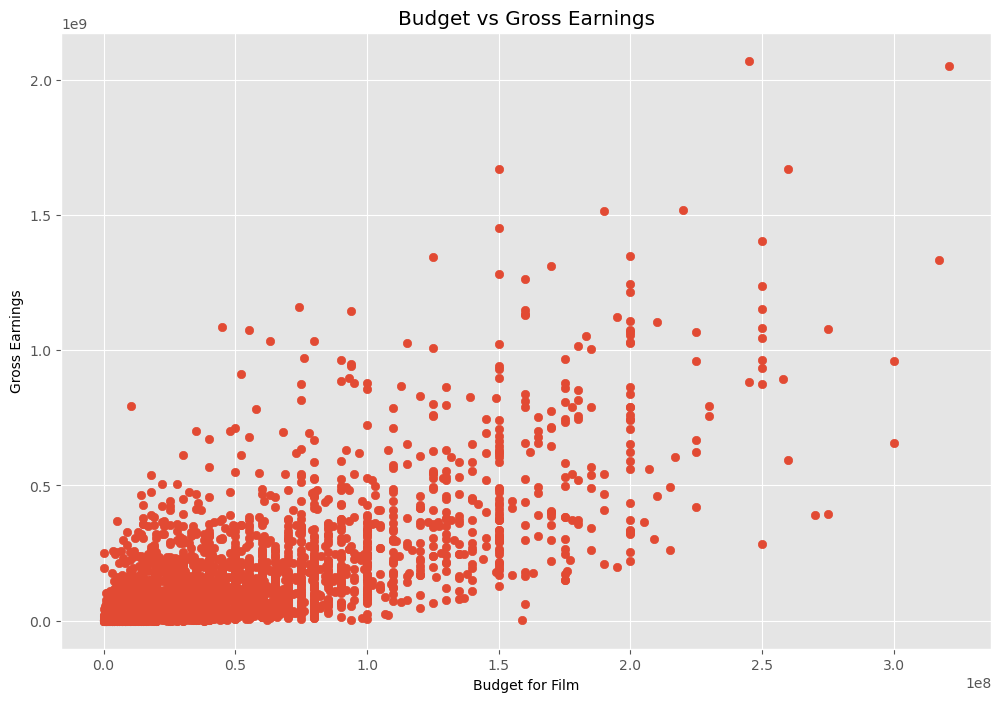

In [14]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')

plt.show()

In [15]:
df.head()

name rating      genre  year  \
6663  Star Wars: Episode VII - The Force Awakens  PG-13     Action  2015   
7244                      Avengers: Infinity War  PG-13     Action  2018   
7480                               The Lion King     PG  Animation  2019   
6653                              Jurassic World  PG-13     Action  2015   
6043                                The Avengers  PG-13     Action  2012   

                               released  score      votes         director  \
6663  December 18, 2015 (United States)    7.8   876000.0      J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0    Anthony Russo   
7480      July 19, 2019 (United States)    6.9   222000.0      Jon Favreau   
6653      June 12, 2015 (United States)    7.0   593000.0  Colin Trevorrow   
6043        May 4, 2012 (United States)    8.0  1300000.0      Joss Whedon   

                  writer               star        country     budget  \
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   
7480      Jeff Nathanson      Donald Glover  United States  260000000   
6653          Rick Jaffa        Chris Pratt  United States  150000000   
6043         Joss Whedon  Robert Downey Jr.  United States  220000000   

           gross               company  runtime  yearcorrect  
6663  2069521700             Lucasfilm    138.0         2015  
7244  2048359754        Marvel Studios    149.0         2018  
7480  1670727580  Walt Disney Pictures    118.0         2019  
6653  1670516444    Universal Pictures    124.0         2015  
6043  1518815515        Marvel Studios    143.0         2012

<Axes: xlabel='budget', ylabel='gross'>

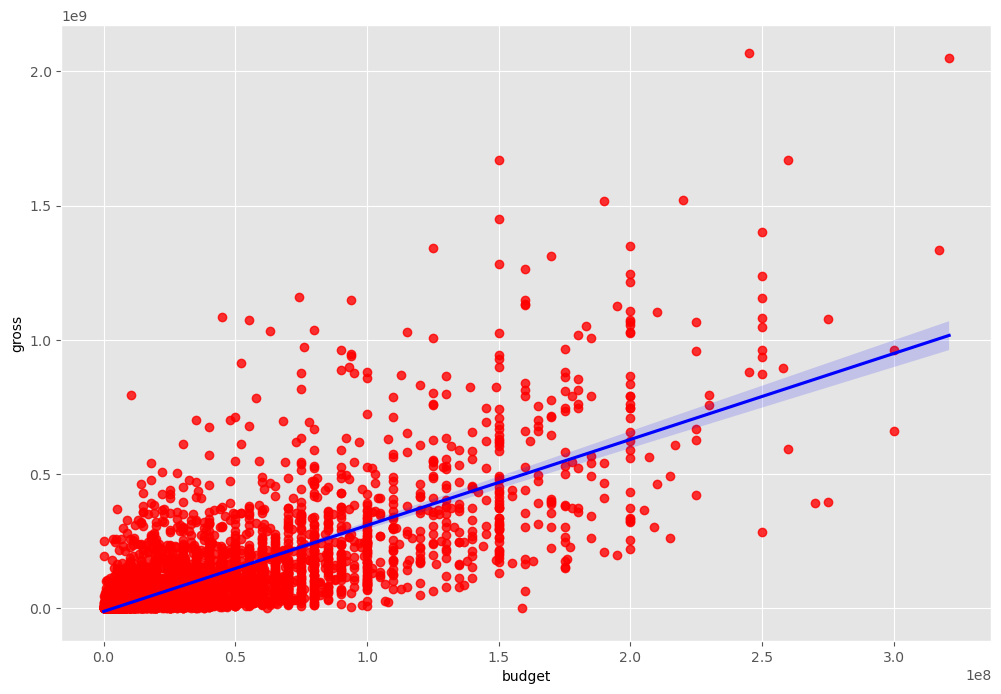

In [16]:
# Plot Budget vs Gross using Seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [17]:
# Looking at correlation
df.corr(method='pearson')[['score', 'votes', 'budget', 'gross', 'runtime', 'yearcorrect']]  #pearson, kendall, spearman

C:\Users\chris\AppData\Local\Temp\ipykernel_17488\425577000.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')[['score', 'votes', 'budget', 'gross', 'runtime', 'yearcorrect']]  #pearson, kendall, spearman


score     votes    budget     gross   runtime  yearcorrect
year         0.055746  0.205973  0.328175  0.283780  0.074210     0.998725
score        1.000000  0.473405  0.067334  0.221701  0.412577     0.061303
votes        0.473405  1.000000  0.431864  0.613791  0.345443     0.203070
budget       0.067334  0.431864  1.000000  0.743536  0.311063     0.320740
gross        0.221701  0.613791  0.743536  1.000000  0.261947     0.277989
runtime      0.412577  0.345443  0.311063  0.261947  1.000000     0.074460
yearcorrect  0.061303  0.203070  0.320740  0.277989  0.074460     1.000000

In [18]:
# High correlation between budget and gross

C:\Users\chris\AppData\Local\Temp\ipykernel_17488\31215580.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


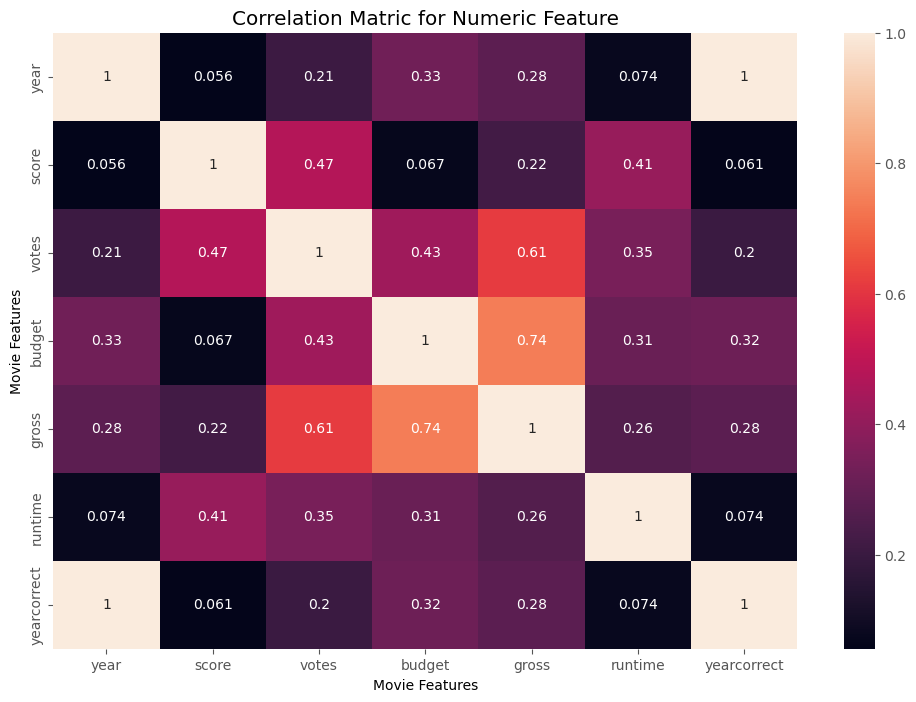

In [19]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Feature')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [20]:
# Looks at company
df.head()

name rating      genre  year  \
6663  Star Wars: Episode VII - The Force Awakens  PG-13     Action  2015   
7244                      Avengers: Infinity War  PG-13     Action  2018   
7480                               The Lion King     PG  Animation  2019   
6653                              Jurassic World  PG-13     Action  2015   
6043                                The Avengers  PG-13     Action  2012   

                               released  score      votes         director  \
6663  December 18, 2015 (United States)    7.8   876000.0      J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0    Anthony Russo   
7480      July 19, 2019 (United States)    6.9   222000.0      Jon Favreau   
6653      June 12, 2015 (United States)    7.0   593000.0  Colin Trevorrow   
6043        May 4, 2012 (United States)    8.0  1300000.0      Joss Whedon   

                  writer               star        country     budget  \
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   
7480      Jeff Nathanson      Donald Glover  United States  260000000   
6653          Rick Jaffa        Chris Pratt  United States  150000000   
6043         Joss Whedon  Robert Downey Jr.  United States  220000000   

           gross               company  runtime  yearcorrect  
6663  2069521700             Lucasfilm    138.0         2015  
7244  2048359754        Marvel Studios    149.0         2018  
7480  1670727580  Walt Disney Pictures    118.0         2019  
6653  1670516444    Universal Pictures    124.0         2015  
6043  1518815515        Marvel Studios    143.0         2012

In [21]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

name  rating  genre  year  released  score      votes  director  writer  \
6663  3641       5      0  2015       528    7.8   876000.0       768    1806   
7244   387       5      0  2018       144    8.4   897000.0       105     513   
7480  4386       4      2  2019      1125    6.9   222000.0      1012    1361   
6653  2115       5      0  2015      1302    7.0   593000.0       335    2523   
6043  3876       5      0  2012      1898    8.0  1300000.0      1060    1646   

      star  country     budget       gross  company  runtime  yearcorrect  
6663   356       47  245000000  2069521700      945    138.0         2015  
7244  1470       47  321000000  2048359754      983    149.0         2018  
7480   457       47  260000000  1670727580     1423    118.0         2019  
6653   293       47  150000000  1670516444     1397    124.0         2015  
6043  1470       47  220000000  1518815515      983    143.0         2012

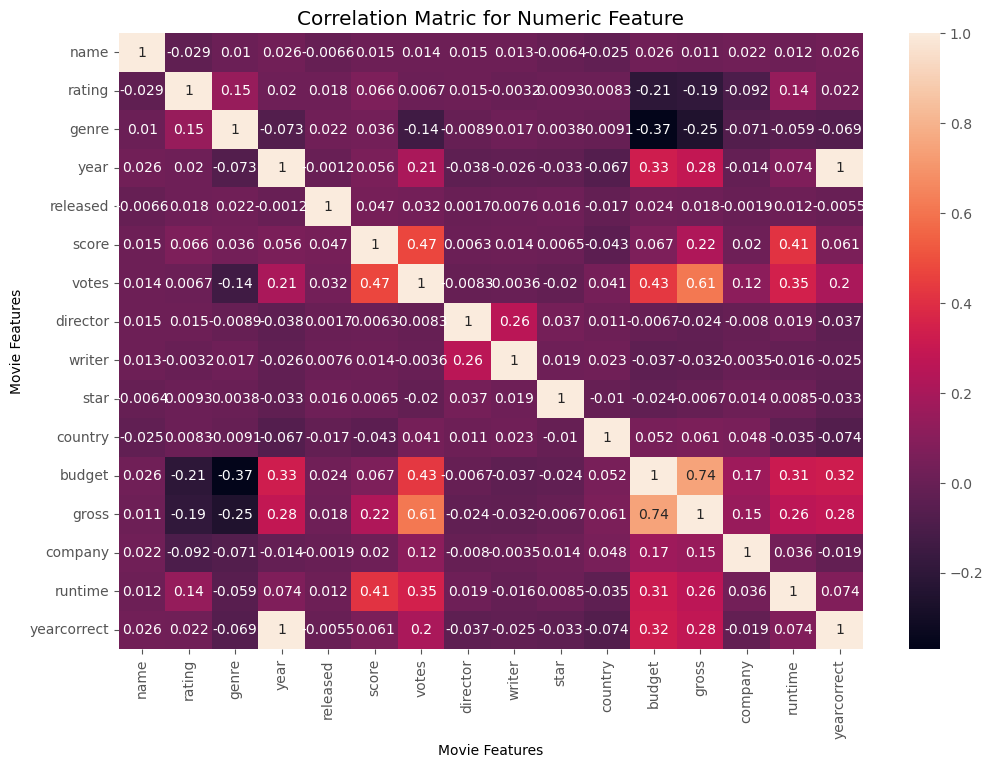

In [22]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Feature')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [23]:
df_numerized.corr()

name    rating     genre      year  released     score  \
name         1.000000 -0.029317  0.010041  0.026334 -0.006593  0.015062   
rating      -0.029317  1.000000  0.147796  0.019580  0.017957  0.066235   
genre        0.010041  0.147796  1.000000 -0.072589  0.021763  0.035701   
year         0.026334  0.019580 -0.072589  1.000000 -0.001223  0.055746   
released    -0.006593  0.017957  0.021763 -0.001223  1.000000  0.047067   
score        0.015062  0.066235  0.035701  0.055746  0.047067  1.000000   
votes        0.013925  0.006672 -0.135750  0.205973  0.032279  0.473405   
director     0.014821  0.014561 -0.008950 -0.037873  0.001683  0.006277   
writer       0.012562 -0.003229  0.017288 -0.025535  0.007586  0.013533   
star        -0.006365  0.009295  0.003795 -0.032607  0.016275  0.006530   
country     -0.025411  0.008271 -0.009073 -0.066891 -0.017016 -0.043403   
budget       0.026016 -0.205162 -0.369849  0.328175  0.024001  0.067334   
gross        0.011162 -0.190168 -0.252619  0.283780  0.018392  0.221701   
company      0.021761 -0.092285 -0.071289 -0.014445 -0.001950  0.020015   
runtime      0.011560  0.141883 -0.058777  0.074210  0.011608  0.412577   
yearcorrect  0.026328  0.022102 -0.068569  0.998725 -0.005485  0.061303   

                votes  director    writer      star   country    budget  \
name         0.013925  0.014821  0.012562 -0.006365 -0.025411  0.026016   
rating       0.006672  0.014561 -0.003229  0.009295  0.008271 -0.205162   
genre       -0.135750 -0.008950  0.017288  0.003795 -0.009073 -0.369849   
year         0.205973 -0.037873 -0.025535 -0.032607 -0.066891  0.328175   
released     0.032279  0.001683  0.007586  0.016275 -0.017016  0.024001   
score        0.473405  0.006277  0.013533  0.006530 -0.043403  0.067334   
votes        1.000000 -0.008284 -0.003613 -0.019975  0.040894  0.431864   
director    -0.008284  1.000000  0.261429  0.037028  0.011294 -0.006731   
writer      -0.003613  0.261429  1.000000  0.018857  0.022618 -0.037460   
star        -0.019975  0.037028  0.018857  1.000000 -0.010146 -0.024360   
country      0.040894  0.011294  0.022618 -0.010146  1.000000  0.052415   
budget       0.431864 -0.006731 -0.037460 -0.024360  0.052415  1.000000   
gross        0.613791 -0.024442 -0.032490 -0.006696  0.060685  0.743536   
company      0.117002 -0.007991 -0.003500  0.013768  0.048432  0.169787   
runtime      0.345443  0.019351 -0.016178  0.008529 -0.035374  0.311063   
yearcorrect  0.203070 -0.036897 -0.025128 -0.033130 -0.073711  0.320740   

                gross   company   runtime  yearcorrect  
name         0.011162  0.021761  0.011560     0.026328  
rating      -0.190168 -0.092285  0.141883     0.022102  
genre       -0.252619 -0.071289 -0.058777    -0.068569  
year         0.283780 -0.014445  0.074210     0.998725  
released     0.018392 -0.001950  0.011608    -0.005485  
score        0.221701  0.020015  0.412577     0.061303  
votes        0.613791  0.117002  0.345443     0.203070  
director    -0.024442 -0.007991  0.019351    -0.036897  
writer      -0.032490 -0.003500 -0.016178    -0.025128  
star        -0.006696  0.013768  0.008529    -0.033130  
country      0.060685  0.048432 -0.035374    -0.073711  
budget       0.743536  0.169787  0.311063     0.320740  
gross        1.000000  0.151729  0.261947     0.277989  
company      0.151729  1.000000  0.036054    -0.018913  
runtime      0.261947  0.036054  1.000000     0.074460  
yearcorrect  0.277989 -0.018913  0.074460     1.000000

In [24]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.029317
             genre          0.010041
             year           0.026334
             released      -0.006593
             score          0.015062
             votes          0.013925
             director       0.014821
             writer         0.012562
             star          -0.006365
             country       -0.025411
             budget         0.026016
             gross          0.011162
             company        0.021761
             runtime        0.011560
             yearcorrect    0.026328
rating       name          -0.029317
             rating         1.000000
             genre          0.147796
             year           0.019580
             released       0.017957
             score          0.066235
             votes          0.006672
             director       0.014561
             writer        -0.003229
             star           0.009295
             country        0.008271
 

In [25]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre        budget        -0.369849
budget       genre         -0.369849
gross        genre         -0.252619
genre        gross         -0.252619
rating       budget        -0.205162
budget       rating        -0.205162
rating       gross         -0.190168
gross        rating        -0.190168
votes        genre         -0.135750
genre        votes         -0.135750
company      rating        -0.092285
rating       company       -0.092285
country      yearcorrect   -0.073711
yearcorrect  country       -0.073711
year         genre         -0.072589
genre        year          -0.072589
             company       -0.071289
company      genre         -0.071289
genre        yearcorrect   -0.068569
yearcorrect  genre         -0.068569
year         country       -0.066891
country      year          -0.066891
genre        runtime       -0.058777
runtime      genre         -0.058777
score        country       -0.043403
country      score         -0.043403
year         director      -0.037873
d

In [26]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross        votes          0.613791
votes        gross          0.613791
budget       gross          0.743536
gross        budget         0.743536
year         yearcorrect    0.998725
yearcorrect  year           0.998725
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [27]:
# Votes and budget have the highest correlation to gross earnings
# Company has low correlation